In [1]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

from settings_and_potential import *

In [2]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-5,5]
a=range_int[0]
b=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), a,b)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, a,b)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, a,b)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, a,b)[0],16)/norm

In [3]:
print(true_mom_1)
print(true_mom_2)
print(true_mom_3)
print(true_mom_4)

-0.5821220254648098
0.78244367281251
-1.2272202679463478
2.3088589485776514


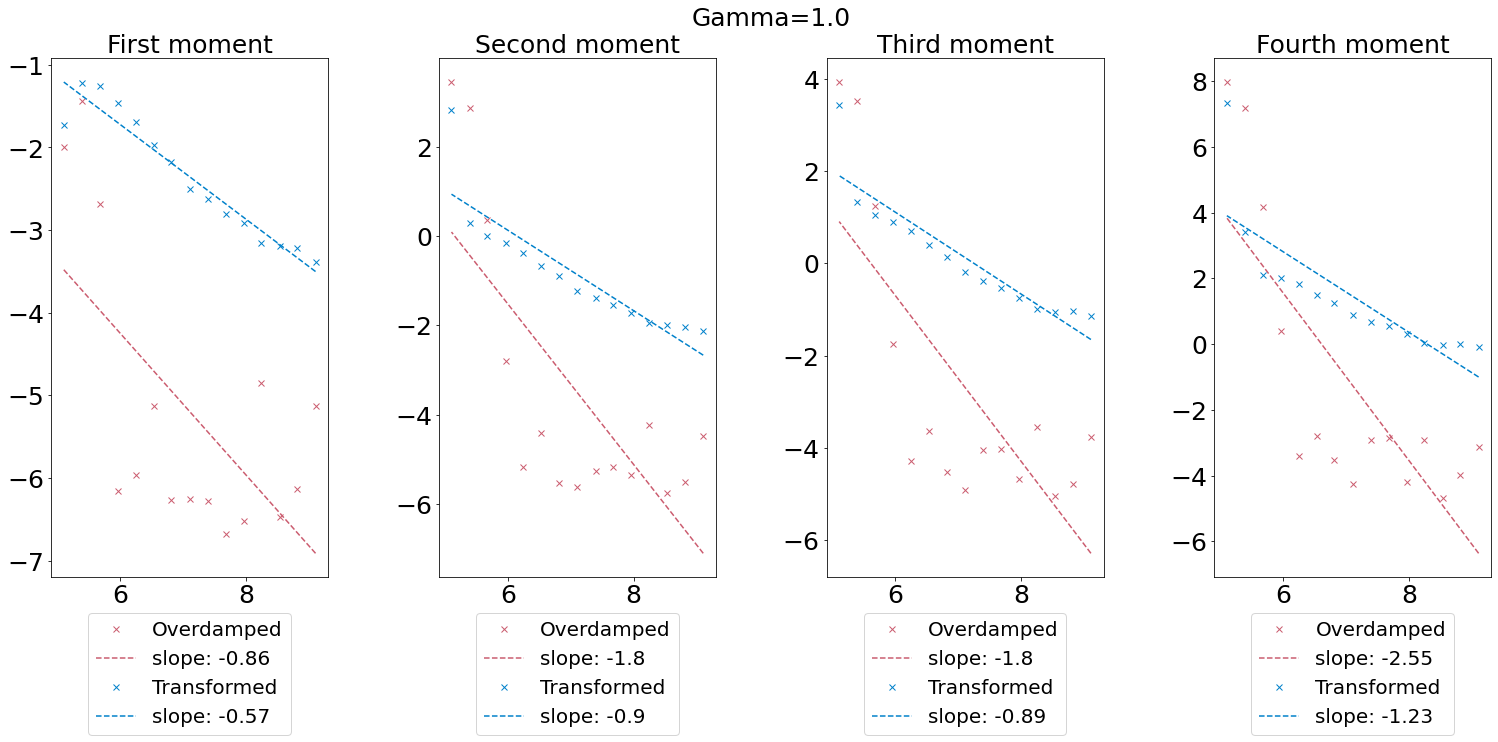

In [4]:
from settings_and_potential import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/1d")

# dtlist=[0.01,0.1,0.2]
# ###########################################
# ## Interpolate the slope
# ###########################################
T=100
xm= np.log(T/dtlist)
x=xm
A = np.vstack([xm, np.ones(len(x))]).T
# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,9))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.7)
fig.suptitle("Gamma="+str(gamma),fontsize=font_size)
ax1.set_title("First moment",fontsize=font_size)
ax2.set_title("Second moment",fontsize=font_size)
ax3.set_title("Third moment",fontsize=font_size)
ax4.set_title("Fourth moment",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("noada_moment1.txt"))
mom2_list=np.hstack(openCfile("noada_moment2.txt"))
mom3_list=np.hstack(openCfile("noada_moment3.txt"))
mom4_list=np.hstack(openCfile("noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)

# interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list), rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list), rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list), rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list), rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("tr_moment1.txt"))
mom2_list=np.hstack(openCfile("tr_moment2.txt"))
mom3_list=np.hstack(openCfile("tr_moment3.txt"))
mom4_list=np.hstack(openCfile("tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,np.log(mom4_list),"x",color=myblue,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list), rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list), rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list), rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list), rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/underdamped")

fig.savefig("figures/moments_logplot_spring_gamma="+str(gamma)+"untilT500.png")

0.18475712172314687
0.33150965503606583


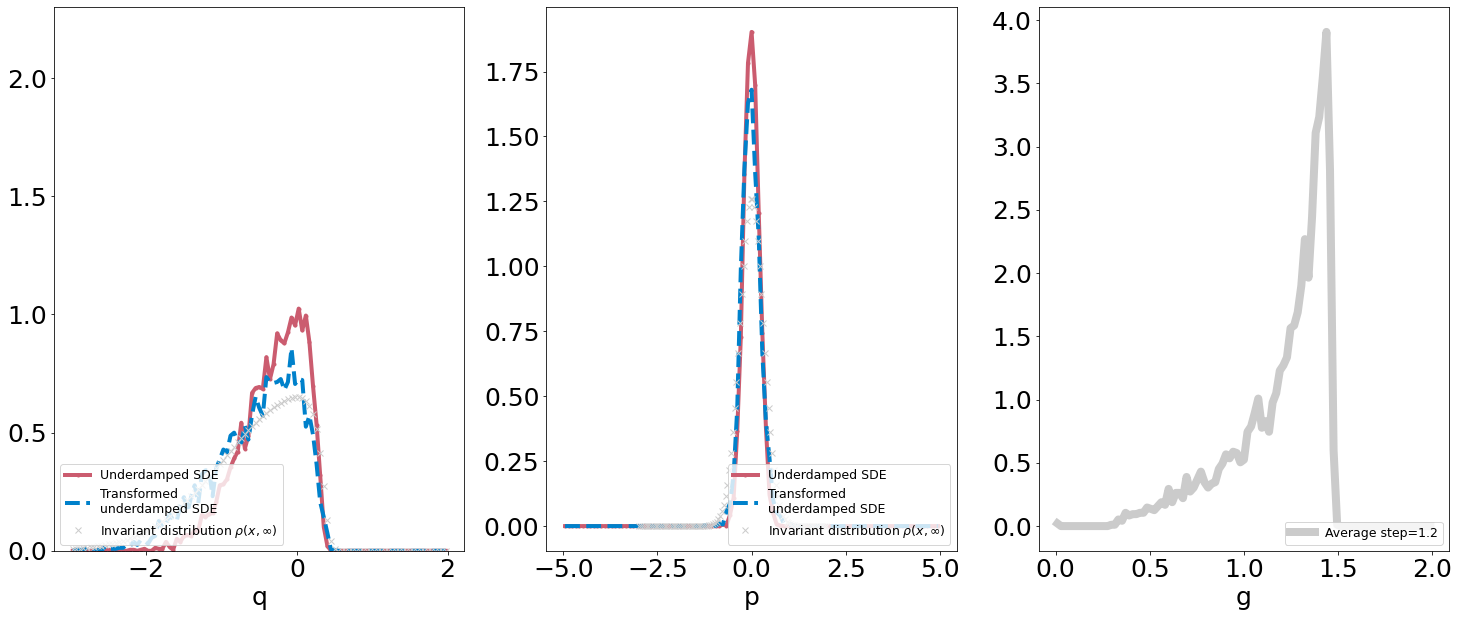

In [73]:
from settings_and_potential import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/1d")


# ###########################################
# ## Import results
# ###########################################
fig, ((axs))= plt.subplots(1,3,figsize=(25,10))# plt.figure(figsize=(4,4))
# fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=105

n=4
range_bins=[-3,2]
# Upload moments
i=6
p_noada=np.hstack(openCfile("vec_noada_pi="+str(i)+".txt"))
q_noada=np.hstack(openCfile("vec_noada_qi="+str(i)+".txt"))
p_tr=np.hstack(openCfile("vec_tr_pi="+str(i)+".txt"))
q_tr=np.hstack(openCfile("vec_tr_qi="+str(i)+".txt"))
g1=np.hstack(openCfile("vec_tr_gi="+str(i)+".txt"))


############
## Q vals ##
############
# SDE
histogram_noada,bins = np.histogram(q_noada,bins=nbins,range=range_bins, density=True)
midx_sde = (bins[0:-1]+bins[1:])/2

#transformed
histogram_tr,bins = np.histogram(q_tr,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

# Q
###
axs[0].plot(midx_sde,histogram_noada,".-",linewidth=lw,label='Underdamped SDE',color=myred)
axs[0].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[0].set_ylim(0,2.3)
axs[0].set_xlabel("q", fontsize=font_size)


############
## P vals ## 
############
range_bins=[-5.,5.]

# no ada
histogram_noada,bins = np.histogram(p_noada,bins=nbins,range=range_bins, density=True)
midx_noada = (bins[0:-1]+bins[1:])/2

# transformed
histogram_tr,bins = np.histogram(p_tr,bins=nbins,range=range_bins, density=True)
midx_tr = (bins[0:-1]+bins[1:])/2

axs[1].plot(midx_noada,histogram_noada,".-",linewidth=lw,label='Underdamped SDE',color=myred)
axs[1].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
axs[1].set_xlabel("p", fontsize=font_size)

############
## Histograms g vals ## 
############
range_bins_g=[0,2]
histogram_g,bins = np.histogram(g1,bins=nbins,range=range_bins_g, density=True)
midx_noada = (bins[0:-1]+bins[1:])/2
mean_g=round(np.mean(g1),2)

axs[2].plot(midx_noada,histogram_g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
axs[2].set_xlabel("g", fontsize=font_size)


axs[0].set_xlabel("q", fontsize=font_size)


# Invariant distribution for q
rho = np.exp(- U(midx_sde)/tau)
rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral
axs[0].plot(midx_sde,rho,"x",linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)

# Invariant distribution for p
### momentum p invariant
rho = np.exp(-(midx_sde**2)/(2*tau))
rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral
axs[1].plot(midx_sde,rho,"x",linewidth=lw,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)

axs[0].legend(fontsize=font_size/2, loc="lower left")
axs[1].legend(fontsize=font_size/2, loc="lower right")
axs[2].legend(fontsize=font_size/2, loc="lower right")


print(np.var(q_noada))

print(np.var(q_tr))